In [67]:
!pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
import wikipedia
# import wikipediaapi 
import datetime
import pandas as pd
import numpy as np
from sklearn import feature_extraction
from sklearn import model_selection
import nltk
from nltk import tokenize
from nltk import word_tokenize, pos_tag
import string
from keras.preprocessing.text import Tokenizer
from sklearn import svm
from sklearn import multiclass
from sklearn import metrics
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras.layers import Embedding, Conv1D, MaxPool1D, GlobalMaxPool1D, Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras import utils

In [69]:
classes = ['sport', 'economy', 'politics', 'health', 'tourism', 
           'entertainment', 'culture', 'music', 'education', 
           'real estate', 'nutrition', 'science', 'history', 'technology'
          ]

In [70]:
def generate_data(classes, n):
    data = [];
    for i in classes:
#         topics = wikipedia.search(i, results = n)
#         for j in topics:
#         print(classes)
#         print("Class: ", i)
        for j in list(wikipedia.search(i,results = n)):
            wiki_wiki = wikipediaapi.Wikipedia('en')
            page_py = wiki_wiki.page(j)
            if(page_py.exists()):
#                 print("Class: ", i)
#                 print("Title: ", j)
#                     print("Section: ", page_py.sections[0].title)
#                     print("Text: ", page_py.text)
                for k in page_py.categories:
                    if i in k.lower(): 
#                         print("Class: ", i)
                        data.append((i, page_py.summary))
                        break
            else:
                continue
    return data

In [71]:
# data = generate_data(classes, 10)

In [72]:
# for i in classes:
#     c = 0
#     for j in range(0, len(data)):
#         if(data[j][0] == i):
#             c = c + 1
#     print("%s %d" %(i, c))

In [73]:
def create_data_csv_file(name, data):
    name = name + '.csv'
#         '_' + str(datetime.datetime.now()).replace(' ', '_').replace('.', '-').replace(':', '-') + 
#         '.csv'
    sep = '<>'
    cols = 'class' + sep + 'text\n'
    with open(name, 'w+', encoding='utf-8') as file:
        file.write(cols)
#         YELLOW,SMALL,STRETCH,ADULT,T
        for i in range(0, len(data)):
            line = data[i][0] + sep + data[i][1].replace('\n', ' ')

            file.write(line)
            file.write('\n')
    file.close()
            
#     print(text)

In [74]:
# create_data_csv_file('data_10', data)

In [75]:
df = pd.read_csv('data_10.csv', sep = '<>')
df

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,class,text
0,sport,Sport pertains to any form of competitive phys...
1,sport,Sport was an American sports magazine. Launche...
2,sport,"Sport, Sport, Sport (Russian: Спорт, спорт, сп..."
3,sport,Sport Lisboa e Benfica (Portuguese pronunciat...
4,sport,Sport diving is an underwater sport that uses ...
...,...,...
100,technology,"Fintech a portmanteau of ""financial technology..."
101,technology,TCL Technology (originally an abbreviation for...
102,technology,Space technology is technology for use in oute...
103,technology,A technology company (or tech company) is an e...


In [76]:
df['class'].value_counts()

sport            10
tourism           9
culture           9
education         9
real estate       9
nutrition         8
science           8
technology        8
health            7
music             7
politics          6
history           6
entertainment     5
economy           4
Name: class, dtype: int64

In [77]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [78]:
dict_class_index = {
    class_name: i for i, class_name in enumerate(df['class'].unique())
}

df['class num'] = df['class'].map(dict_class_index)

In [79]:
df

,class,text,class num
0,sport,Sport pertains to any form of competitive phys...,0
1,sport,Sport was an American sports magazine. Launche...,0
2,sport,"Sport, Sport, Sport (Russian: Спорт, спорт, сп...",0
3,sport,Sport Lisboa e Benfica (Portuguese pronunciat...,0
4,sport,Sport diving is an underwater sport that uses ...,0
...,...,...,...
100,technology,"Fintech a portmanteau of ""financial technology...",13
101,technology,TCL Technology (originally an abbreviation for...,13
102,technology,Space technology is technology for use in oute...,13
103,technology,A technology company (or tech company) is an e...,13


In [80]:
dict_class_index

{'sport': 0,
 'economy': 1,
 'politics': 2,
 'health': 3,
 'tourism': 4,
 'entertainment': 5,
 'culture': 6,
 'music': 7,
 'education': 8,
 'real estate': 9,
 'nutrition': 10,
 'science': 11,
 'history': 12,
 'technology': 13}

In [81]:
!pip install advertools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
import advertools as adv
stop_words = sorted(adv.stopwords['english'])
print(stop_words)

['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'ca', 'call', 'can', 'cannot', 'could', 'did', 'do', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'have', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon

In [83]:
def clear_text(text):
    new_text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words])).str.lower()
    new_text = new_text.replace(r'[^\w\s]+', '', regex=True)
    return new_text

In [84]:
new_text = clear_text(df['text'])

In [85]:
df['clear text'] = new_text
df

,class,text,class num,clear text
0,sport,Sport pertains to any form of competitive phys...,0,sport pertains form competitive physical activ...
1,sport,Sport was an American sports magazine. Launche...,0,sport american sports magazine launched septem...
2,sport,"Sport, Sport, Sport (Russian: Спорт, спорт, сп...",0,sport sport sport russian спорт спорт спорт 19...
3,sport,Sport Lisboa e Benfica (Portuguese pronunciat...,0,sport lisboa e benfica portuguese pronunciatio...
4,sport,Sport diving is an underwater sport that uses ...,0,sport diving underwater sport uses recreationa...
...,...,...,...,...
100,technology,"Fintech a portmanteau of ""financial technology...",13,fintech portmanteau financial technology refer...
101,technology,TCL Technology (originally an abbreviation for...,13,tcl technology originally abbreviation telepho...
102,technology,Space technology is technology for use in oute...,13,space technology technology use outer space tr...
103,technology,A technology company (or tech company) is an e...,13,a technology company or tech company electroni...


In [86]:
newest_text = []
for i in range(0, len(df)):
    newest_text.append(word_tokenize(df['clear text'][i]))

In [87]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [88]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [89]:
def my_lemmitezer(text):
    return pos_tag(word_tokenize(text))

In [90]:
tokenized_lemmitzed_text = []
for i in range(0, len(df)):
    tokenized_lemmitzed_text.append(my_lemmitezer(df['clear text'][i]))

In [91]:
df['tokenized lemmitzed text'] = tokenized_lemmitzed_text

In [92]:
stemmer = nltk.stem.PorterStemmer()

In [93]:
def my_stemmer(text):
    tokenized_stemmed_text = []
    tokens = word_tokenize(text)
    for token in tokens:
        tokenized_stemmed_text.append(stemmer.stem(token))
    return tokenized_stemmed_text

In [94]:
tokenized_stemmed_text = []
for i in range(0, len(df)):
    tokenized_stemmed_text.append(my_stemmer(df['clear text'][i]))

In [95]:
df['tokenized stemmed text'] = tokenized_stemmed_text
# df['tokenized stemmed text'] = df['tokenized stemmed text'].str.join(' ')

In [96]:
x = df['clear text']
x

0      sport pertains form competitive physical activ...
1      sport american sports magazine launched septem...
2      sport sport sport russian спорт спорт спорт 19...
3      sport lisboa e benfica portuguese pronunciatio...
4      sport diving underwater sport uses recreationa...
                             ...                        
100    fintech portmanteau financial technology refer...
101    tcl technology originally abbreviation telepho...
102    space technology technology use outer space tr...
103    a technology company or tech company electroni...
104    agricultural technology agrotechnology abbrevi...
Name: clear text, Length: 105, dtype: object

In [97]:
y = df['class num']
y

0       0
1       0
2       0
3       0
4       0
       ..
100    13
101    13
102    13
103    13
104    13
Name: class num, Length: 105, dtype: int64

In [98]:
x_tr, x_ft, y_tr, y_ft = model_selection.train_test_split(x, y, test_size=0.2, stratify=y)

In [99]:
x_tr

44    alternative culture type culture exists outsid...
71    a realestate bubble property bubble or housing...
80    parenteral nutrition pn feeding nutritional pr...
39    jyp entertainment corporation korean jyp 엔터테인먼...
83    science systematic enterprise builds organizes...
                            ...                        
98    information technology it use computers create...
69    real estate investing involves purchase manage...
52    country also called country western genre popu...
91    history from ancient greek ἱστορία romanized h...
46    the culture fictional interstellar postscarcit...
Name: clear text, Length: 84, dtype: object

In [100]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_tr, y_tr, test_size=0.3, stratify=y_tr, random_state=5)

In [101]:
count_vectorizer_t = feature_extraction.text.TfidfVectorizer()

In [102]:
count_vectorizer_t.fit(x_train)

TfidfVectorizer()

In [103]:
x_train_t_tfidf = count_vectorizer_t.transform(x_train)
x_test_t_tfidf = count_vectorizer_t.transform(x_test)

In [104]:
model = svm.LinearSVC(max_iter=100000)

In [105]:
model_t = multiclass.OneVsRestClassifier(model)

In [106]:
model_t.fit(x_train_t_tfidf, y_train)

OneVsRestClassifier(estimator=LinearSVC(max_iter=100000))

In [107]:
y_test_predicted_t = model_t.predict(x_test_t_tfidf)

In [108]:
cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_test_predicted_t), columns=df['class'].unique(), index=df['class'].unique())
cm

,sport,economy,politics,health,tourism,entertainment,culture,music,education,real estate,nutrition,science,history,technology
sport,2,0,0,0,0,0,0,0,0,0,0,0,0,0
economy,0,1,0,0,0,0,0,0,0,0,0,0,0,0
politics,0,0,2,0,0,0,0,0,0,0,0,0,0,0
health,0,0,0,2,0,0,0,0,0,0,0,0,0,0
tourism,0,0,0,0,2,0,0,0,0,0,0,0,0,0
entertainment,0,0,0,0,0,1,0,0,0,0,0,0,0,0
culture,0,0,0,0,0,0,2,0,0,0,0,0,0,0
music,0,0,0,0,0,0,0,2,0,0,0,0,0,0
education,0,0,0,0,0,0,0,0,2,0,0,0,0,0
real estate,0,0,0,0,0,0,0,0,0,2,0,0,0,0


In [109]:
print(metrics.classification_report(y_test, y_test_predicted_t))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         1
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      0.50      0.67         2
          11       0.67      1.00      0.80         2
          12       1.00      0.50      0.67         2
          13       0.00      0.00      0.00         2

    accuracy                           0.85        26
   macro avg       0.86      0.86      0.84        26
weighted avg       0.85      0.85      0.83        26



In [110]:
metrics.f1_score(y_test, y_test_predicted_t, average='macro')

0.838095238095238

In [111]:
count_vectorizer_l = feature_extraction.text.TfidfVectorizer(tokenizer=my_lemmitezer)

In [112]:
count_vectorizer_l.fit(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


TfidfVectorizer(tokenizer=<function my_lemmitezer at 0x7fa9f7d797a0>)

In [113]:
x_train_l_tfidf = count_vectorizer_l.transform(x_train)
x_test_l_tfidf = count_vectorizer_l.transform(x_test)

In [114]:
model = svm.LinearSVC(max_iter=100000)

In [115]:
model_l = multiclass.OneVsRestClassifier(model)

In [116]:
model_l.fit(x_train_l_tfidf, y_train)

OneVsRestClassifier(estimator=LinearSVC(max_iter=100000))

In [117]:
y_test_predicted_l = model_l.predict(x_test_l_tfidf)

In [118]:
cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_test_predicted_l), columns=df['class'].unique(), index=df['class'].unique())
cm

,sport,economy,politics,health,tourism,entertainment,culture,music,education,real estate,nutrition,science,history,technology
sport,2,0,0,0,0,0,0,0,0,0,0,0,0,0
economy,0,1,0,0,0,0,0,0,0,0,0,0,0,0
politics,0,0,2,0,0,0,0,0,0,0,0,0,0,0
health,0,0,0,2,0,0,0,0,0,0,0,0,0,0
tourism,0,0,0,0,2,0,0,0,0,0,0,0,0,0
entertainment,0,0,0,0,0,1,0,0,0,0,0,0,0,0
culture,0,0,0,0,0,0,2,0,0,0,0,0,0,0
music,0,0,0,0,0,0,0,2,0,0,0,0,0,0
education,0,0,0,0,0,0,0,0,2,0,0,0,0,0
real estate,0,0,0,0,0,0,0,0,0,2,0,0,0,0


In [119]:
print(metrics.classification_report(y_test, y_test_predicted_l))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         1
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      0.50      0.67         2
          11       0.67      1.00      0.80         2
          12       1.00      0.50      0.67         2
          13       0.00      0.00      0.00         2

    accuracy                           0.85        26
   macro avg       0.86      0.86      0.84        26
weighted avg       0.85      0.85      0.83        26



In [120]:
metrics.f1_score(y_test, y_test_predicted_l, average='macro')

0.838095238095238

In [121]:
count_vectorizer_s = feature_extraction.text.TfidfVectorizer(tokenizer=my_stemmer)

In [122]:
count_vectorizer_s.fit(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


TfidfVectorizer(tokenizer=<function my_stemmer at 0x7fa9f7477ef0>)

In [123]:
x_train_s_tfidf = count_vectorizer_s.transform(x_train)
x_test_s_tfidf = count_vectorizer_s.transform(x_test)

In [124]:
model = svm.LinearSVC(max_iter=100000)

In [125]:
model_s = multiclass.OneVsRestClassifier(model)

In [126]:
model_s.fit(x_train_s_tfidf, y_train)

OneVsRestClassifier(estimator=LinearSVC(max_iter=100000))

In [127]:
y_test_predicted_s = model_s.predict(x_test_s_tfidf)

In [128]:
cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_test_predicted_s), columns=df['class'].unique(), index=df['class'].unique())
cm

,sport,economy,politics,health,tourism,entertainment,culture,music,education,real estate,nutrition,science,history,technology
sport,2,0,0,0,0,0,0,0,0,0,0,0,0,0
economy,0,1,0,0,0,0,0,0,0,0,0,0,0,0
politics,0,0,2,0,0,0,0,0,0,0,0,0,0,0
health,0,0,0,2,0,0,0,0,0,0,0,0,0,0
tourism,0,0,0,0,2,0,0,0,0,0,0,0,0,0
entertainment,0,0,0,0,0,1,0,0,0,0,0,0,0,0
culture,0,0,0,0,0,0,2,0,0,0,0,0,0,0
music,0,0,0,0,0,0,0,2,0,0,0,0,0,0
education,0,0,0,0,0,0,0,0,2,0,0,0,0,0
real estate,0,0,0,0,0,0,0,0,0,2,0,0,0,0


In [129]:
print(metrics.classification_report(y_test, y_test_predicted_s))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      0.50      0.67         2
          11       0.67      1.00      0.80         2
          12       1.00      0.50      0.67         2
          13       0.50      0.50      0.50         2

    accuracy                           0.88        26
   macro avg       0.92      0.89      0.89        26
weighted avg       0.91      0.88      0.88        26



In [130]:
metrics.f1_score(y_test, y_test_predicted_s, average='macro')

0.8880952380952382

In [131]:
# !wget https://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip

In [132]:
file = open('glove.6B.100d.txt', 'r', encoding='utf-8')
lines  = file.readlines()
file.close()

In [133]:
word_embeddings = {}

for line in lines:
    strs = line.split()
    word = strs[0]
    coefs = np.array(strs[1:], dtype='float32')
    
    word_embeddings[word] = coefs

In [134]:
x_train

40     caesars entertainment inc eldorado resorts inc...
63     physical education abbreviated phys ed pe subj...
72     real estate appraisal property valuation land ...
89     data science interdisciplinary field uses scie...
33     the world tourism rankings compiled united nat...
82     holozoic nutrition greek holowhole  zoikosof a...
64     sex education known sexual education sexuality...
75     nutrition biochemical physiological process or...
71     a realestate bubble property bubble or housing...
14     politics from greek πολιτικά politiká affairs ...
7      squash racket ball sport played players fourwa...
53     a music genre conventional category identifies...
51     music music music put another nickel in popula...
34     tourism geography study travel tourism industr...
9      bbc sport sports division bbc providing nation...
6      swimming individual team racing sport requires...
12     the peoples republic china high income develop...
31     the minister tourism hea

In [135]:
dimension = 100
# voc_size = 15000 #voditi racuna ovo mora da se povecava kada se poveca broj tekstova
voc_size = len(word_embeddings)
tokenizer = Tokenizer(num_words=voc_size)
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

In [136]:
num_of_words = min(voc_size, len(word_index))

In [137]:
coef_matrix = np.zeros((num_of_words, dimension))

for word, ord_num in word_index.items():
    if ord_num >= num_of_words:
        continue
    
    embedding_vector = word_embeddings.get(word)
    if embedding_vector is not None:
        coef_matrix[ord_num] = embedding_vector

In [138]:
# max_len = max([len(i) for i in x_train])
max_len = 100

In [139]:
data_len = len(x_train)
x_train = x_train.apply(lambda x: [coef_matrix[word_index[word] - 1] for word in x.split(' ') if word in word_index])
x_train_glove = sequence.pad_sequences([x for x in x_train], maxlen=max_len, dtype='float16')
x_train_glove = x_train_glove.reshape(data_len, max_len * 100).astype('float16')

In [140]:
x_train_glove

array([[ 0.     ,  0.     ,  0.     , ..., -0.872  ,  1.034  ,  0.3826 ],
       [ 0.     ,  0.     ,  0.     , ..., -0.1625 ,  0.01245, -0.2854 ],
       [ 0.2452 ,  1.02   ,  0.1521 , ..., -0.2163 ,  0.6772 ,  0.434  ],
       ...,
       [ 0.     ,  0.     ,  0.     , ..., -0.378  ,  0.2668 , -0.9634 ],
       [ 0.     ,  0.     ,  0.     , ..., -0.4858 ,  0.903  , -0.665  ],
       [ 0.2822 ,  0.2    , -0.6333 , ..., -0.4546 ,  1.533  , -0.28   ]],
      dtype=float16)

In [141]:
data_len = len(x_test)
x_test = x_test.apply(lambda x: [coef_matrix[word_index[word] - 1] for word in x.split(' ') if word in word_index])
x_test_glove = sequence.pad_sequences([x for x in x_test], maxlen=max_len, dtype='float16')
x_test_glove = x_test_glove.reshape(data_len, max_len * 100).astype('float16')

In [142]:
# def convert_to_svm_fromat(text, max_len):
#     text = text.apply(lambda x: [coef_matrix[word_index[word] - 1] for word in x.split(' ') if word in word_index])

#     x_train_glove = []

#     for i in text:
#         glove = []
#         for j in i:
#             glove.extend(j)
#         if len(i) < max_len:
#             glove.extend(np.zeros((max_len - len(i))*100))
#         x_train_glove.append(glove)
#     return x_train_glove

In [143]:
model = svm.LinearSVC(max_iter=100000)

In [144]:
model_g = multiclass.OneVsRestClassifier(model)

In [145]:
model_g.fit(x_train_glove, y_train)

OneVsRestClassifier(estimator=LinearSVC(max_iter=100000))

In [146]:
y_test_predicted_g = model_g.predict(x_test_glove)

In [147]:
cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_test_predicted_g), columns=df['class'].unique(), index=df['class'].unique())
cm

,sport,economy,politics,health,tourism,entertainment,culture,music,education,real estate,nutrition,science,history,technology
sport,1,0,0,0,0,0,0,0,0,0,0,1,0,0
economy,0,0,0,0,0,0,0,0,0,1,0,0,0,0
politics,0,0,0,0,1,0,0,0,1,0,0,0,0,0
health,0,0,0,0,0,0,0,0,0,0,0,1,0,1
tourism,0,0,0,0,0,0,0,2,0,0,0,0,0,0
entertainment,1,0,0,0,0,0,0,0,0,0,0,0,0,0
culture,1,0,0,0,0,0,1,0,0,0,0,0,0,0
music,0,0,0,0,1,0,0,1,0,0,0,0,0,0
education,0,0,0,0,0,0,0,1,1,0,0,0,0,0
real estate,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [148]:
print(metrics.classification_report(y_test, y_test_predicted_g))

              precision    recall  f1-score   support

           0       0.17      0.50      0.25         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       1.00      0.50      0.67         2
           7       0.25      0.50      0.33         2
           8       0.33      0.50      0.40         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.33      0.50      0.40         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2

    accuracy                           0.19        26
   macro avg       0.15      0.18      0.15        26
weighted avg       0.16      0.19      0.16        26



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [149]:
metrics.f1_score(y_test, y_test_predicted_g, average='macro')

0.1464285714285714

In [150]:
maxlen = max([x_train_t_tfidf[i].data.shape[0] for i in range(x_train_t_tfidf.shape[0])])
maxlen = 500

In [151]:
x_train_t_tfidf = sequence.pad_sequences([x.data for x in x_train_t_tfidf], maxlen=maxlen, dtype='float16')
x_test_t_tfidf = sequence.pad_sequences([x.data for x in x_test_t_tfidf], maxlen=maxlen, dtype='float16')

In [152]:
vocabulary_size = len(count_vectorizer_t.vocabulary_)
vocabulary_size

3231

In [153]:
y_train = utils.to_categorical(y_train, 14)
y_test = utils.to_categorical(y_test, 14)
y_test

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0

In [154]:
model = Sequential([Embedding(vocabulary_size, 128, input_length=maxlen), 
                    Conv1D(100, 2, activation='relu'), 
                    MaxPool1D(pool_size=14),
                    Conv1D(48, 14, activation='relu'), 
                    # MaxPool1D(pool_size=14),
                    # Conv1D(48, 7, activation='sigmoid'), 
                    # MaxPool1D(pool_size=5),
                    GlobalMaxPool1D(),
                    Flatten(),
                    Dense(units=256, activation='relu'),
                    Dense(14, activation='softmax')
                   ]) 

In [155]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          413568    
                                                                 
 conv1d (Conv1D)             (None, 499, 100)          25700     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 35, 100)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 22, 48)            67248     
                                                                 
 global_max_pooling1d (Globa  (None, 48)               0         
 lMaxPooling1D)                                                  
                                                                 
 flatten (Flatten)           (None, 48)                0

In [156]:
model.compile(loss=BinaryCrossentropy(), optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [157]:
history = model.fit(x_train_t_tfidf, y_train, epochs=10, batch_size=256, validation_split=0.2, verbose=1)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.6925 - accuracy: 0.0870 - val_loss: 0.6876 - val_accuracy: 0.0833
Epoch 2/10
1/1 [==============================] - 0s 373ms/step - loss: 0.6874 - accuracy: 0.0870 - val_loss: 0.6805 - val_accuracy: 0.0833
Epoch 3/10
1/1 [==============================] - 0s 272ms/step - loss: 0.6804 - accuracy: 0.0870 - val_loss: 0.6709 - val_accuracy: 0.0833
Epoch 4/10
1/1 [==============================] - 0s 302ms/step - loss: 0.6707 - accuracy: 0.0870 - val_loss: 0.6575 - val_accuracy: 0.0833
Epoch 5/10
1/1 [==============================] - 0s 293ms/step - loss: 0.6572 - accuracy: 0.0870 - val_loss: 0.6396 - val_accuracy: 0.0833
Epoch 6/10
1/1 [==============================] - 0s 254ms/step - loss: 0.6392 - accuracy: 0.0870 - val_loss: 0.6165 - val_accuracy: 0.0833
Epoch 7/10
1/1 [==============================] - 0s 262ms/step - loss: 0.6159 - accuracy: 0.0870 - val_loss: 0.5877 - val_accuracy: 0.0833
Epoch 8/10
1/1 [=======

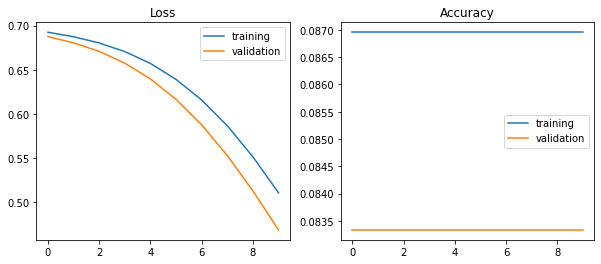

In [158]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.epoch, history.history['loss'], label='training')
plt.plot(history.epoch, history.history['val_loss'], label='validation')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.epoch, history.history['accuracy'], label='training')
plt.plot(history.epoch, history.history['val_accuracy'], label='validation')
plt.legend(loc='best')

plt.show()

In [159]:
train_scores = model.evaluate(x_train_t_tfidf, y_train)

2/2 [==============================] - 0s 37ms/step - loss: 0.4667 - accuracy: 0.0862


In [160]:
train_scores

[0.46667414903640747, 0.08620689809322357]

In [161]:
test_scores = model.evaluate(x_test_t_tfidf, y_test)

1/1 [==============================] - 0s 44ms/step - loss: 0.4680 - accuracy: 0.0769


In [162]:
test_scores

[0.46804749965667725, 0.07692307978868484]

In [163]:
maxlen = max([x_train_l_tfidf[i].data.shape[0] for i in range(x_train_l_tfidf.shape[0])])
maxlen = 500

In [164]:
x_train_l_tfidf = sequence.pad_sequences([x.data for x in x_train_l_tfidf], maxlen=maxlen, dtype='float16')
x_test_l_tfidf = sequence.pad_sequences([x.data for x in x_test_l_tfidf], maxlen=maxlen, dtype='float16')

In [165]:
vocabulary_size = len(count_vectorizer_l.vocabulary_)

In [166]:
model = Sequential([Embedding(vocabulary_size, 128, input_length=maxlen), 
                    Conv1D(48, 10, activation='sigmoid'), 
                    MaxPool1D(pool_size=48),
                    # Conv1D(48, 7, activation='sigmoid'), 
                    # MaxPool1D(pool_size=5),
                    GlobalMaxPool1D(),
                    Flatten(),
                    Dense(14, activation='softmax')
                   ]) 

In [167]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 128)          464384    
                                                                 
 conv1d_2 (Conv1D)           (None, 491, 48)           61488     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 10, 48)           0         
 1D)                                                             
                                                                 
 global_max_pooling1d_1 (Glo  (None, 48)               0         
 balMaxPooling1D)                                                
                                                                 
 flatten_1 (Flatten)         (None, 48)                0         
                                                                 
 dense_2 (Dense)             (None, 14)               

In [168]:
model.compile(loss=BinaryCrossentropy(), optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [169]:
history = model.fit(x_train_l_tfidf, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.7780 - accuracy: 0.0870 - val_loss: 0.7788 - val_accuracy: 0.0833
Epoch 2/10
1/1 [==============================] - 0s 309ms/step - loss: 0.7763 - accuracy: 0.0870 - val_loss: 0.7770 - val_accuracy: 0.0833
Epoch 3/10
1/1 [==============================] - 0s 298ms/step - loss: 0.7745 - accuracy: 0.0870 - val_loss: 0.7753 - val_accuracy: 0.0833
Epoch 4/10
1/1 [==============================] - 0s 300ms/step - loss: 0.7728 - accuracy: 0.0870 - val_loss: 0.7735 - val_accuracy: 0.0833
Epoch 5/10
1/1 [==============================] - 0s 300ms/step - loss: 0.7710 - accuracy: 0.0870 - val_loss: 0.7718 - val_accuracy: 0.0833
Epoch 6/10
1/1 [==============================] - 0s 302ms/step - loss: 0.7693 - accuracy: 0.0870 - val_loss: 0.7701 - val_accuracy: 0.0833
Epoch 7/10
1/1 [==============================] - 0s 283ms/step - loss: 0.7675 - accuracy: 0.0870 - val_loss: 0.7683 - val_accuracy: 0.0833
Epoch 8/10
1/1 [=======

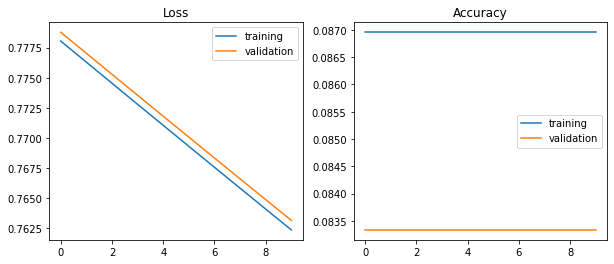

In [170]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.epoch, history.history['loss'], label='training')
plt.plot(history.epoch, history.history['val_loss'], label='validation')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.epoch, history.history['accuracy'], label='training')
plt.plot(history.epoch, history.history['val_accuracy'], label='validation')
plt.legend(loc='best')

plt.show()

In [171]:
train_scores = model.evaluate(x_train_l_tfidf, y_train)

2/2 [==============================] - 0s 34ms/step - loss: 0.7611 - accuracy: 0.0862


In [172]:
train_scores

[0.7611293792724609, 0.08620689809322357]

In [173]:
test_scores = model.evaluate(x_test_l_tfidf, y_test)

1/1 [==============================] - 0s 58ms/step - loss: 0.7643 - accuracy: 0.0769


In [174]:
test_scores

[0.7643445730209351, 0.07692307978868484]

In [175]:
maxlen = max([x_train_s_tfidf[i].data.shape[0] for i in range(x_train_s_tfidf.shape[0])])
maxlen  = 500

In [176]:
x_train_s_tfidf = sequence.pad_sequences([x.data for x in x_train_s_tfidf], maxlen=maxlen, dtype='float16')
x_test_s_tfidf = sequence.pad_sequences([x.data for x in x_test_s_tfidf], maxlen=maxlen, dtype='float16')

In [177]:
vocabulary_size = len(count_vectorizer_s.vocabulary_)

In [178]:
model = Sequential([Embedding(vocabulary_size, 128, input_length=maxlen), 
                    Conv1D(48, 10, activation='sigmoid'), 
                    MaxPool1D(pool_size=48),
                    # Conv1D(48, 7, activation='sigmoid'), 
                    # MaxPool1D(pool_size=5),
                    GlobalMaxPool1D(),
                    Flatten(),
                    Dense(14, activation='softmax')
                   ]) 

In [179]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 128)          314496    
                                                                 
 conv1d_3 (Conv1D)           (None, 491, 48)           61488     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 10, 48)           0         
 1D)                                                             
                                                                 
 global_max_pooling1d_2 (Glo  (None, 48)               0         
 balMaxPooling1D)                                                
                                                                 
 flatten_2 (Flatten)         (None, 48)                0         
                                                                 
 dense_3 (Dense)             (None, 14)               

In [180]:
model.compile(loss=BinaryCrossentropy(), optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [181]:
history = model.fit(x_train_s_tfidf, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.7420 - accuracy: 0.0652 - val_loss: 0.7424 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 299ms/step - loss: 0.7402 - accuracy: 0.0652 - val_loss: 0.7406 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 293ms/step - loss: 0.7383 - accuracy: 0.0652 - val_loss: 0.7388 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 288ms/step - loss: 0.7365 - accuracy: 0.0652 - val_loss: 0.7370 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 280ms/step - loss: 0.7347 - accuracy: 0.0652 - val_loss: 0.7352 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 283ms/step - loss: 0.7329 - accuracy: 0.0652 - val_loss: 0.7334 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 283ms/step - loss: 0.7311 - accuracy: 0.0652 - val_loss: 0.7316 - val_accuracy: 0.0000

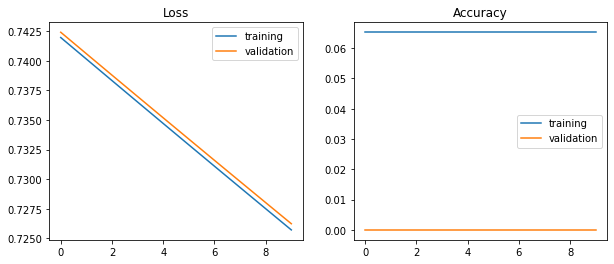

In [182]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.epoch, history.history['loss'], label='training')
plt.plot(history.epoch, history.history['val_loss'], label='validation')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.epoch, history.history['accuracy'], label='training')
plt.plot(history.epoch, history.history['val_accuracy'], label='validation')
plt.legend(loc='best')

plt.show()

In [183]:
train_scores = model.evaluate(x_train_s_tfidf, y_train)

2/2 [==============================] - 0s 36ms/step - loss: 0.7244 - accuracy: 0.0517


In [184]:
train_scores

[0.7243961095809937, 0.0517241396009922]

In [185]:
test_scores = model.evaluate(x_test_s_tfidf, y_test)

1/1 [==============================] - 0s 54ms/step - loss: 0.7201 - accuracy: 0.0769


In [186]:
test_scores

[0.7201408743858337, 0.07692307978868484]

In [187]:
max_len = 100

In [188]:
x_train_glove.shape

(58, 10000)

In [189]:
voc_size

400000

In [190]:
model = Sequential([Embedding(1000, 128, input_length=max_len*100), 
                    Conv1D(48, 14, activation='sigmoid'), 
                    MaxPool1D(pool_size=48),
                    # Conv1D(48, 7, activation='sigmoid'), 
                    # MaxPool1D(pool_size=5),
                    GlobalMaxPool1D(),
                    Flatten(),
                    Dense(14, activation='softmax')
                   ]) 

In [191]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 10000, 128)        128000    
                                                                 
 conv1d_4 (Conv1D)           (None, 9987, 48)          86064     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 208, 48)          0         
 1D)                                                             
                                                                 
 global_max_pooling1d_3 (Glo  (None, 48)               0         
 balMaxPooling1D)                                                
                                                                 
 flatten_3 (Flatten)         (None, 48)                0         
                                                                 
 dense_4 (Dense)             (None, 14)               

In [192]:
model.compile(loss=BinaryCrossentropy(), optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [193]:
import tensorflow as tf
with tf.device('/device:GPU:0'):
  history = model.fit(x_train_glove, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/10


InvalidArgumentError: ignored